<a href="https://colab.research.google.com/github/HocJ2me/Decision-Tree/blob/main/Decision_Tree_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Định nghĩa Decision Tree

Trong lý thuyết quyết định, một cây quyết định (Decision tree) là một đồ thị của các quyết định và các hậu quả có thể của nó (bao gồm rủi ro và hao phí tài nguyên). Cây quyết định được sử dụng để xây dựng một kế hoạch nhằm đạt được mục tiêu mong muốn. Các cây quyết được dùng để hỗ trợ quá trình ra quyết định.

Cây quyết định là một dạng đặc biệt của cấu trúc cây.


Trong lĩnh vực học máy, cây quyết định là một kiểu mô hình dự báo (Predictive model), nghĩa là một ánh xạ từ các quan sát về một sự vật/hiện tượng dẫn tới các kết luận về giá trị mục tiêu của sự vật/hiện tượng.




Kỹ thuật học máy dùng trong cây quyết định được gọi là học bằng cây quyết định, hay chỉ gọi với cái tên ngắn gọn là cây quyết định.

Decision tree là một mô hình supervised learning, có thể được áp dụng vào cả hai bài toán classification và regression. Việc xây dựng một decision tree trên dữ liệu huấn luyện cho trước là việc đi xác định các câu hỏi và thứ tự của chúng. Một điểm đáng lưu ý của decision tree là nó có thể làm việc với các đặc trưng (trong các tài liệu về decision tree, các đặc trưng thường được gọi là thuộc tính – attribute) dạng categorical, thường là rời rạc và không có thứ tự. Ví dụ, mưa, nắng hay xanh, đỏ, v.v. Decision tree cũng làm việc với dữ liệu có vector đặc trưng bao gồm cả thuộc tính dạng categorical và liên tục (numeric). Một điểm đáng lưu ý nữa là decision tree ít yêu cầu việc chuẩn hoá dữ liệu.

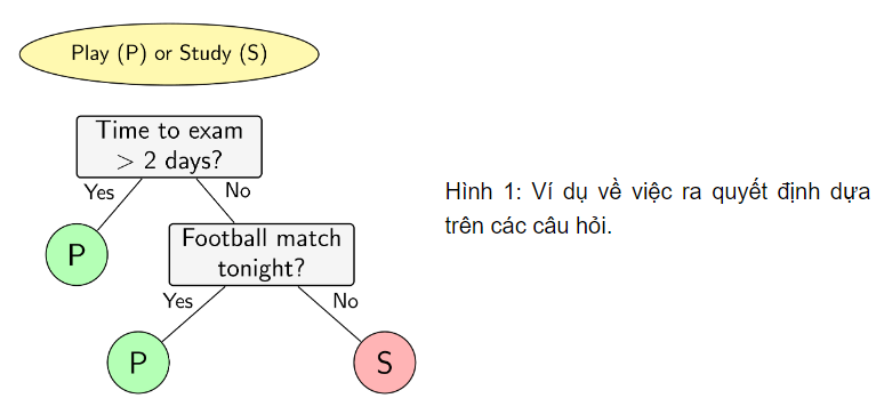

Việc quan sát, suy nghĩ và ra các quyết định của con người thường được bắt đầu từ các câu hỏi. Machine learning cũng có một mô hình ra quyết định dựa trên các câu hỏi. Mô hình này có tên là cây quyết định (decision tree).



## 2. Mô hình input output

Một thuật toán Machine Learning thường sẽ có 2 bước:

1. Huấn luyện: Từ dữ liệu thuật toán sẽ học ra model.

2. Dự đoán: Dùng model học được từ bước trên dự đoán các giá trị mới.

Bước huấn luyện ở thuật toán Decision Tree sẽ xây dựng ra một cây quyết định. Ví dụ, như với dữ liệu Titatic, thuật toán Decision Tree sẽ học ra model dạng cây như thế này

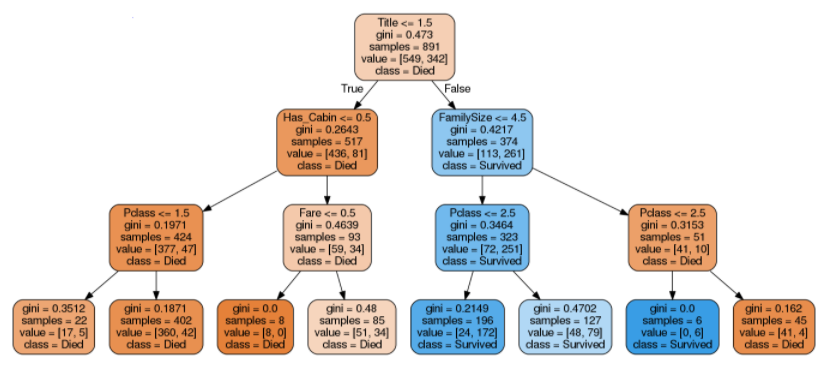



Thông tin Title được lấy ra từ trường Name. Sau đó trường Title, Sex được chuyển về dạng số

In [ ]:
title_mapping   = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
sex_mapping     = {'female': 0, 'male': 1}

Sau đó ở bước dự đoán, thuật toán sẽ dựa vào thông tin của hành khách và đi theo các điều kiện của cây từ trên xuống dưới để cho ra dự đoán xem người đó sống hay chết. Ví dụ với thông tin khách hàng thế này:

In [ ]:
import pandas as pd
titanic_path = "https://media.githubusercontent.com/media/tiepvupsu/tabml_data/master/titanic/"
data = pd.read_csv(titanic_path + "train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Từ trường Name, mình sẽ lấy được Title là “Mr” rồi chuyển về dạng số là 1.

- Title = 1 <= 1.5, điều kiện đúng nên kiểm tra tiếp điều kiện ở node con phía dưới bên trái.

- Has_Cabin = 0 <= 0.5, điều kiện đúng nên kiểm tra tiếp điều kiện ở node con ở dưới bên trái (trường Cabin là NaN nên has_cabin thành 0).

- Pclass = 3 >= 1.5, điều kiện sai nên xuống node con bên phải, node này là node lá có kết quả dự đoán luôn chứ không cần kiểm tra điều kiện nữa.

- Lấy thông tin từ node lá, dự đoán class = Died.

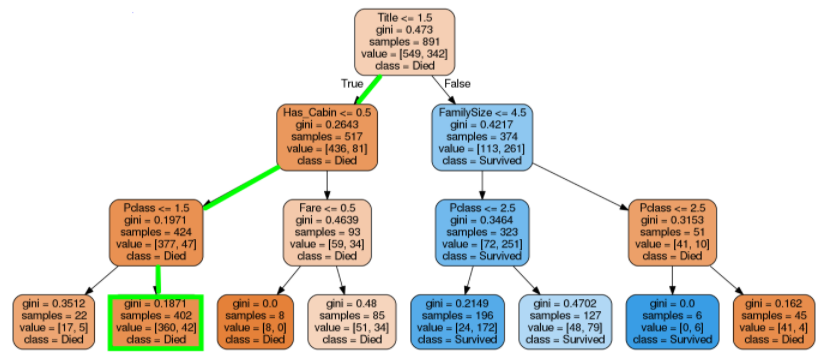

Ở cây quyết định này mình thấy 2 kiểu node:

- Node có điều kiện kiểm tra, mình gọi là node điều kiện. Các node điều kiện đều có 2 node con ở dưới.

- Node lá, không có điều kiện mà có kết quả dự đoán. Các node lá không có node con.

Vấn đề bây giờ đặt ra là làm thế nào để xây dựng cây quyết định.

Giả sử mình có bài toán phân loại 2 lớp và mỗi dữ liệu có 2 biến đặc trưng là x1 và x2. Dữ liệu của mình khi vẽ biểu đồ scatter lên sẽ như thế này.

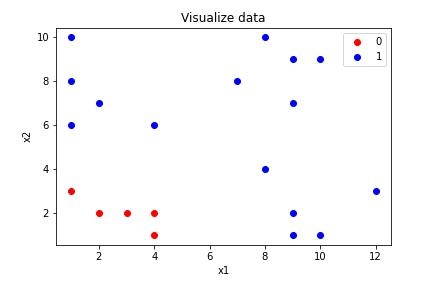

Xét điều kiện x1>5, giống như một đường phân chia, chia dữ liệu làm 2 phần, 1 phần thỏa mãn điều kiện và 1 phần không thỏa mãn điều kiện.


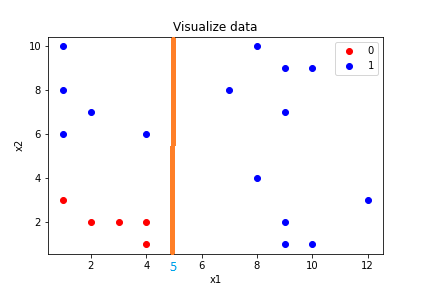

Nhận thấy nếu x1>5 đúng thì tất cả các dữ liệu thuộc lớp 1, thế nên ở đây sẽ dùng lớp lá để dự đoán đây là lớp 1 luôn. Ngược lại thì thấy dữ liệu có cả lớp 1 và lớp 0, nên tiếp tục thêm điều kiện x2>4

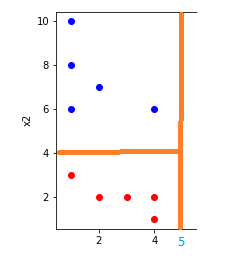

Nếu điều kiện x2>4 đúng thì mình thấy các dữ liệu thuộc lớp 1, ngược lại các dữ liệu thuộc lớp 0. Do đó 2 node con của node điều kiện trên đều là node lá để cho ra kết quả dự đoán. Cuối cùng mình sẽ được cây quyết định như thế này.

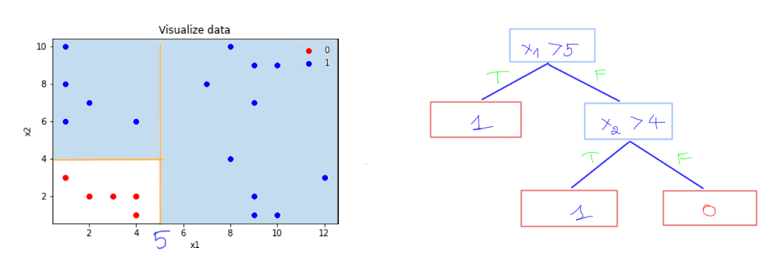


## 3. Ưu điểm và nhược điểm của mô hình Decision Tree
3.1 Ưu điểm của mô hình Decision Tree:
- Dễ hiểu và dễ giải thích. Khác với các thuật toán ví dụ như Artificial Neural network không thể hiện rõ quy luật phân loại. Đồng thời bộ dữ liệu training không nhất thiết phải quá lớn để tiến hành xây dựng mô hình phân tích.
- Có thể xử lý tốt một lượng lớn dữ liệu trong khoảng thời gian ngắn. Có thể dùng máy tính cá nhân để phân tích các lượng dữ liệu lớn trong một thời gian đủ ngắn để cho phép các nhà chiến lược đưa ra quyết định dựa trên phân tích của cây quyết định.
- Có thể giúp chúng ta phân loại đối tượng dữ liệu theo biến mục tiêu có nhiều lớp, nhiều nhóm khác nhau(multi-class classification) đặc biệt nếu biến mục tiêu là dạng biến định lượng phức tạp.
- Xây dựng và phân lớp nhanh.
- Mô hình dạng white box rõ ràng (là những mô hình có đường biên phân chia có thể giải thích được).
3.2 Nhược điểm cuả mô hình Decision Tree"
- Mô hình cây quyết định phụ thuộc rất lớn vào dữ liệu. Thậm chí, với một sự thay đổi nhỏ trong bộ dữ liệu, cấu trúc mô hình cây quyết định có thể thay đổi hoàn toàn.
- Không đảm bảo xây dựng được cây tối ưu.
- Khó giải quyết được những vấn đề có dữ liệu phụ thuộc thời gian liên tục- dễ xảy ra lỗi khi có quá nhiều lớp chi phí tính toán để xây dựng mô hình cây quyết định CAO.
- Cây quyết định hay gặp vấn đề overfitting.
- Ví dụ: Mô hình bị overfitting
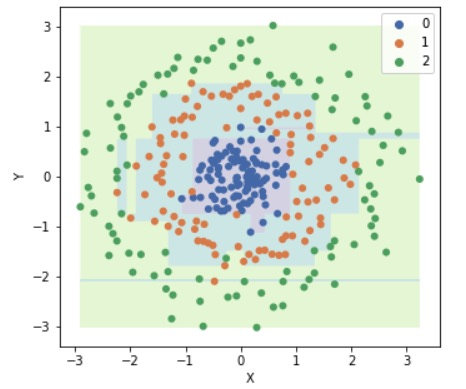

Mọi người thấy mô hình Decision Tree trên overfitting với dữ liệu, và tạo ra đường phân chia rất lạ. Tạo ra những cây quá khớp với dữ liệu huấn luyện hay quá phức tạp.

## 4. Vận dụng 

Để xây dựng một mô hình Decision Tree đơn giản cho môn học, nhóm chúng em sử dụng thư viện Pandas để đọc các dữ liệu từ file salaries.csv là file lương thu nhập dựa theo công ty mà chúng em đã có sẵn.

In [1]:
import pandas as pd

Tiếp theo, nhóm sẽ đọc file csv và lưu vào biến dt. File csv có ở trong github nhóm.

In [2]:
dt = pd.read_csv("dataset1.csv")

In ra một vài thông tin của dt

In [3]:
dt.info()
dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X_1      1386 non-null   float64
 1   X_2      1386 non-null   float64
 2   X_3      1386 non-null   float64
 3   X_4      1386 non-null   float64
 4   X_5      1386 non-null   float64
 5   X_6      1386 non-null   float64
 6   X_7      1386 non-null   float64
 7   X_8      1386 non-null   float64
 8   X_9      1386 non-null   float64
 9   X_10     1386 non-null   float64
 10  X_11     1386 non-null   float64
 11  X_12     1386 non-null   float64
 12  X_13     1386 non-null   float64
 13  X_14     1386 non-null   float64
 14  default  1386 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 162.5 KB


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,default
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,0.170278,0.001691,0.054968,0.062716,0.560767,1.254322,2.131551,1.539185,328.102826,77.685724,0.224608,19.421051,172.769019,1.173062,0.108947
std,0.508847,1.547621,0.100787,1.480917,0.245446,44.491183,3.819918,3.756771,2726.258640,1023.767573,0.428770,175.939915,736.991971,1.120200,0.311685
min,-1.913810,-34.088001,-0.787533,-33.215206,0.006384,-1634.473326,0.152879,0.061564,-140.925194,-3042.945048,-10.749789,0.000000,-3847.237333,-0.005430,0.000000
25%,0.082053,0.012129,0.008342,0.029608,0.371002,0.534848,1.073101,0.559159,1.456148,0.130820,0.045493,1.863539,32.294448,0.441256,0.000000
50%,0.142557,0.040448,0.040320,0.116848,0.584232,1.335955,1.359348,0.865763,3.786689,0.370919,0.143536,3.789041,69.343617,0.923430,0.000000
75%,0.224242,0.090176,0.099767,0.218052,0.738902,2.653123,2.102653,1.439282,20.495488,1.154742,0.311470,8.784728,156.277504,1.546772,0.000000
max,18.203388,40.794376,0.915385,16.667323,1.820207,132.434822,67.136373,67.136373,77002.674190,29094.270810,4.270540,5986.727881,22564.720760,10.631788,1.000000


In ra 5 giá trị ban đầu của file dataset1.csv

In [4]:
dt.head(5)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,default
0,0.025642,0.191400,0.160930,0.214043,0.297961,0.424422,2.662066,1.838742,25.833741,-0.434526,0.353503,4.236882,82.317985,0.840803,0
1,0.042655,0.045051,0.039219,0.055876,0.298246,0.425001,2.368381,1.720530,3.162899,-0.356441,0.366003,3.859418,86.196295,0.870553,0
2,0.021754,0.048249,0.039820,0.058682,0.343069,0.522229,1.962698,1.455363,3.549034,-0.339404,0.397319,4.476976,80.493231,0.825301,0
3,-0.117883,0.073355,0.025140,0.033634,0.132316,0.152493,4.146137,3.602147,4.078948,-20.556697,0.429623,2.975269,142.351046,0.342719,0
4,0.204942,0.093075,0.158317,0.327810,0.530245,1.128769,1.423378,1.056306,19.987152,0.646424,0.333295,7.129179,43.522324,1.700951,0


Bộ dữ liệu ban đầu có 16 cột: 15 cột X và 1 cột default. Từ bộ dữ liệu này, ta sẽ tách cột default là target để đánh giá, 15 cột còn lại sẽ tách ra làm output cho model. Vói dữ liệu 1385 hàng, nhóm tách ra 30% bộ dữ liệu để test, 70% để training model.

Import train_test_split method

In [5]:
from sklearn.model_selection import train_test_split

Chia bộ dữ liệu ban đầu ra 4 phần, X_train, X_test, y_train và y_test datasets. Trong đó X_train và X_test là 15 cột ban đầu (X_test 30%, X_train 70%) còn y_train và y_test là cột default ban đầu.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    dt.drop(columns='default'),
    dt.default,
    test_size=0.2,
    random_state=42,
    stratify=dt.default
)

Tiếp theo là khai báo Desision Tree trong sklearn, tiến hành trainin và kiểm tra kết quả. 
-> I instantiate the model (using the default parameters).

In [10]:
from sklearn import tree
treeDecision = tree.DecisionTreeClassifier()

Học mô hình với dữ liệu đã xử lý bên trên (X_train,y_train)

In [12]:
treeDecision.fit(X_train,y_train)

DecisionTreeClassifier()

Vậy là đã training xong dữ liệu, giờ nhóm đã có model Decision Tree tên là treeDecision. Tiếp theo, nhóm sẽ đánh giá kết quả dựa theo bộ dữ liệu Test đã tách ra ban đầu (X_test, y_test). y_pred là biến mà model treeDecision đã dự đoán dự vào X_test.

In [17]:
y_pred=treeDecision.predict(X_test)

Nhóm dử dụng module metrics của sklearn để đánh giá mô hình. Nhóm đánh giá bằng một confussion matrix giữa y_test (giá trị default ban đầu) và y_pred (giá trị mà model dự đoán) 

In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[240,   8],
       [ 15,  15]])

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9172661870503597
Precision: 0.6521739130434783
Recall: 0.5


**Đánh giá mô hình**: 

*   Mô hình có khả năng học từ bộ dữ liệu đã cho
*   Với default = 0, kết quả học của mô hình khá cao (94%) tuy nhiên với default = 1 tỉ lệ thấp (65%)  
*   Số lượng mẫu với default = 0 nhiều hơn hẳn số lượng mẫu với default = 1



